In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# collecting training data 
train=pd.read_csv('D:/ML Project/healthcare fraud detection/Train.csv')
inpatient=pd.read_csv('D:/ML Project/healthcare fraud detection/Train_Inpatientdata.csv')
outpatient=pd.read_csv('D:/ML Project/healthcare fraud detection/Train_Outpatientdata.csv')
beneficiary=pd.read_csv('D:/ML Project/healthcare fraud detection/Train_Beneficiarydata.csv')
train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [126]:
train_data_lst=[train,inpatient,outpatient,beneficiary]
data_names=["Train Data",'Inpatient Data','Outpatient Data','Beneficiary Data']
for i,j in zip(train_data_lst,data_names):
    print('\n******************',j,'**********************\n')
    print("Shape = ",i.shape)
    print("\nColumns ",i.columns)
    print('\nData Types :\n',i.dtypes)
    print("\nComplete Info : \n",i.info())
    print("\nComplete Description : \n",i.describe)


****************** Train Data **********************

Shape =  (5410, 2)

Columns  Index(['Provider', 'PotentialFraud'], dtype='object')

Data Types :
 Provider          object
PotentialFraud    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

Complete Info : 
 None

Complete Description : 
 <bound method NDFrame.describe of       Provider PotentialFraud
0     PRV51001             No
1     PRV51003            Yes
2     PRV51004             No
3     PRV51005            Yes
4     PRV51007             No
...        ...            ...
5405  PRV57759             No
5406  PRV57760             No
5407  PRV57761             No
5408  PRV57762             No
5409  PRV57763             No

[5410 rows x 2 

In [127]:
print(inpatient.columns)
print(outpatient.columns)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagn

In [128]:
# Column Description

# Identifiers & General Information

# - Provider: Unique ID representing the healthcare provider.
# - PotentialFraud: Label indicating whether the provider is suspected of fraud (Yes/No).
# - BeneID: Unique ID assigned to the beneficiary (patient).
# - ClaimID: Unique identifier for an insurance claim.

# Claim Dates

# - ClaimStartDt: The date when the claim period starts.
# - ClaimEndDt: The date when the claim period ends.
# - AdmissionDt: Date when the patient was admitted (for inpatient claims).
# - DischargeDt: Date when the patient was discharged (for inpatient claims).

# Financial Information

# - InscClaimAmtReimbursed: Amount reimbursed by insurance for the claim.
# - DeductibleAmtPaid: The deductible amount paid by the patient.

# Medical Personnel Involved

# - AttendingPhysician: ID of the primary physician overseeing the treatment.
# - OperatingPhysician: ID of the physician performing an operation (if any).
# - OtherPhysician: ID of any other involved physician.

# Diagnosis & Procedures

# - ClmAdmitDiagnosisCode: Code representing the primary diagnosis at admission.
# - DiagnosisGroupCode: Group code classifying related diagnoses.
# - ClmDiagnosisCode_1 to ClmDiagnosisCode_10: Diagnosis codes related to the claim (up to 10).
# - ClmProcedureCode_1 to ClmProcedureCode_6: Procedure codes indicating medical procedures performed during treatment.

### **Patient Demographics & Health Status**

#  - DOB: Date of Birth of the patient.
#  - DOD: Date of Death (if applicable).
#  - Gender: Gender of the patient.
#  - Race: Patient’s race category.
#  - RenalDiseaseIndicator: Indicates if the patient has End-Stage Renal Disease (Y/N).
#  - State: State of residence for the patient.
#  - County: County of residence for the patient.

# Insurance Coverage Details

# - NoOfMonths_PartACov: Number of months the patient had Medicare Part A coverage.
# - NoOfMonths_PartBCov: Number of months the patient had Medicare Part B coverage.

# Chronic Conditions

# (Indicate whether the patient has a chronic condition: 1 = Yes, 0 = No)

#  - ChronicCond_Alzheimer: Alzheimer's disease.
#  - ChronicCond_Heartfailure: Heart failure.
#  - ChronicCond_KidneyDisease: Chronic kidney disease.
#  - ChronicCond_Cancer: Cancer.
#  - ChronicCond_ObstrPulmonary: Chronic obstructive pulmonary disease (COPD).
#  - ChronicCond_Depression: Depression.
#  - ChronicCond_Diabetes: Diabetes.
#  - ChronicCond_IschemicHeart: Ischemic heart disease.
#  - ChronicCond_Osteoporasis: Osteoporosis.
#  - ChronicCond_rheumatoidarthritis: Rheumatoid arthritis.
#  - ChronicCond_stroke: Stroke.

# Annual Financial Data

# - IPAnnualReimbursementAmt: Total inpatient claims reimbursement amount in the year.
# - IPAnnualDeductibleAmt: Total inpatient deductible amount paid by the patient in the year.
# - OPAnnualReimbursementAmt: Total outpatient claims reimbursement amount in the year.
# - OPAnnualDeductibleAmt: Total outpatient deductible amount paid by the patient in the year.

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
# Checking missing columns 
print('Columns not in OP:',[i for i in inpatient.columns if i not in outpatient.columns])
print('Columns not in IP:',[i for i in outpatient.columns if i not in inpatient.columns])

Columns not in OP: ['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']
Columns not in IP: []


In [131]:
# Merging the training datsets 
# Merging outpatient and inpatient data 
patient_merge=pd.concat([inpatient,outpatient],ignore_index=True)
patient_merge


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#Merging  patient and beneficiary data
beneficiary_merge=patient_merge.merge(beneficiary,how='left',on='BeneID')
beneficiary_merge

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,1,2,2,1,2,0,0,5470,1870


In [133]:
# Merging target data to beneficiary data
train_merge=train.merge(beneficiary_merge,how='left',on='Provider')
train_merge

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0
3,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,1,1,1,2,1,2,143800,4272,880,70
4,PRV51001,No,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,PHY402229,PHY329739,NaN,...,1,1,1,2,1,1,111710,4272,80,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100,PHY321072,PHY321072,PHY321072,...,1,1,1,1,1,2,0,0,1780,320
558207,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200,PHY321072,NaN,NaN,...,2,2,2,2,2,2,0,0,200,200
558208,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80,PHY321072,PHY321072,PHY321072,...,2,1,1,2,2,2,28150,2136,1980,500
558209,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300,PHY321072,NaN,PHY321072,...,2,1,1,2,2,2,0,0,3700,240


In [134]:
#Selecting test data

test=pd.read_csv('D:/ML Project/healthcare fraud detection/Test.csv')
inpatient_test=pd.read_csv('D:/ML Project/healthcare fraud detection/Test_Inpatientdata.csv')
outpatient_test=pd.read_csv('D:/ML Project/healthcare fraud detection/Test_Outpatientdata.csv')
beneficiary_test=pd.read_csv('D:/ML Project/healthcare fraud detection/Test_Beneficiarydata.csv')
test

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018
...,...
1348,PRV57713
1349,PRV57726
1350,PRV57745
1351,PRV57749


In [135]:
test_data_list=[test,inpatient_test,outpatient_test,beneficiary_test]
for i,j in zip(test_data_list,data_names):
    print('\n******************',j,'**********************\n')
    print("Shape = ",i.shape)
    print("\nColumns ",i.columns)
    print('\nData Types :\n',i.dtypes)
    print("\nComplete Info : \n",i.info())
    print("\nComplete Description : \n",i.describe)


****************** Train Data **********************

Shape =  (1353, 1)

Columns  Index(['Provider'], dtype='object')

Data Types :
 Provider    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB

Complete Info : 
 None

Complete Description : 
 <bound method NDFrame.describe of       Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]>

****************** Inpatient Data **********************

Shape =  (9551, 30)

Columns  Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmA

In [136]:

print([i for i in inpatient_test.columns if i not in outpatient_test.columns])
print([i for i in outpatient_test.columns if i not in inpatient_test.columns])

['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']
[]


In [137]:
#Merging test data of inpatient and outpatient (Same columns)
patient_merge_test=pd.concat([inpatient_test,outpatient_test],ignore_index=True)
patient_merge_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135387,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135388,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135389,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135390,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
#Merging to Beneficiary and patient data
beneficiary_merge_test=patient_merge_test.merge(beneficiary_test,on='BeneID',how='left')
beneficiary_merge

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,1,2,2,1,2,0,0,5470,1870
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,1,2,2,1,2,0,0,5470,1870


In [139]:
#merging to test data
test_merge=test.merge(beneficiary_merge_test,how='left',on='Provider')
test_merge

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,NaN,...,2,1,2,2,2,2,0,0,1310,590
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,NaN,...,1,1,1,2,2,2,22000,3204,1020,910
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,NaN,...,1,1,1,2,2,2,22000,3204,1020,910
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100,PHY366184,NaN,NaN,NaN,...,1,1,1,2,2,2,22000,3204,1020,910
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400,PHY401762,NaN,PHY330212,NaN,...,2,1,1,1,2,1,8000,13136,1520,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135387,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300,PHY323525,NaN,NaN,NaN,...,1,1,1,2,2,2,0,0,2300,60
135388,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10,PHY374125,NaN,NaN,NaN,...,1,2,1,2,2,2,0,0,2970,760
135389,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200,PHY323525,NaN,NaN,NaN,...,1,2,1,2,2,2,0,0,200,60
135390,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300,PHY323525,PHY323525,NaN,NaN,...,2,1,1,2,2,2,0,0,5640,830


In [140]:
# Finding the missing values in both test and train dataset 
print(train_merge.isna().sum())
print(".................................")
print(test_merge.isna().sum())

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                

In [141]:
#Combining the test_merge data and Train_merge data ( THE ACTUAL DATASET )
final=pd.concat([train_merge,test_merge],ignore_index=True)
final

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0
3,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,1,1,1,2,1,2,143800,4272,880,70
4,PRV51001,No,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,PHY402229,PHY329739,NaN,...,1,1,1,2,1,1,111710,4272,80,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693598,PRV57750,NaN,BENE142702,CLM672301,2009-11-08,2009-11-09,1300,PHY323525,NaN,NaN,...,1,1,1,2,2,2,0,0,2300,60
693599,PRV57750,NaN,BENE143805,CLM603938,2009-09-28,2009-09-28,10,PHY374125,NaN,NaN,...,1,2,1,2,2,2,0,0,2970,760
693600,PRV57750,NaN,BENE146568,CLM236733,2009-03-09,2009-03-09,200,PHY323525,NaN,NaN,...,1,2,1,2,2,2,0,0,200,60
693601,PRV57750,NaN,BENE148715,CLM624293,2009-10-10,2009-10-12,2300,PHY323525,PHY323525,NaN,...,2,1,1,2,2,2,0,0,5640,830


In [158]:
final.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depres

In [159]:
final.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0
3,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,1,1,1,2,1,2,143800,4272,880,70
4,PRV51001,No,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,PHY402229,PHY329739,NaN,...,1,1,1,2,1,1,111710,4272,80,70


In [160]:
final.tail()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
693598,PRV57750,NaN,BENE142702,CLM672301,2009-11-08,2009-11-09,1300,PHY323525,NaN,NaN,...,1,1,1,2,2,2,0,0,2300,60
693599,PRV57750,NaN,BENE143805,CLM603938,2009-09-28,2009-09-28,10,PHY374125,NaN,NaN,...,1,2,1,2,2,2,0,0,2970,760
693600,PRV57750,NaN,BENE146568,CLM236733,2009-03-09,2009-03-09,200,PHY323525,NaN,NaN,...,1,2,1,2,2,2,0,0,200,60
693601,PRV57750,NaN,BENE148715,CLM624293,2009-10-10,2009-10-12,2300,PHY323525,PHY323525,NaN,...,2,1,1,2,2,2,0,0,5640,830
693602,PRV57750,NaN,BENE150236,CLM675578,2009-11-10,2009-11-10,200,PHY323525,PHY323525,PHY323525,...,2,2,1,2,2,2,0,0,290,1120


In [161]:
                 #Gathering Basic information
final.shape

(693603, 55)

In [162]:
final.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,693603.000000,692508.000000,28777.000000,6753.000000,1194.000000,147.000000,11.000000,0.0,693603.000000,693603.000000,...,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000,693603.000000
mean,993.946652,78.045881,5897.916878,4112.423812,4213.791457,4157.000000,5594.181818,NaN,1.578329,1.252199,...,1.565636,1.294047,1.240666,1.682604,1.689043,1.897722,5236.391870,569.991877,2278.024807,648.832214
std,3815.048768,273.388693,3051.862702,2033.473128,2259.466628,2150.837521,2899.350300,NaN,0.493827,0.713245,...,0.495674,0.455614,0.427488,0.465463,0.462886,0.303013,11778.476175,1185.633533,3902.381291,1001.112746
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,0.000000,3868.000000,2724.000000,2724.000000,2756.500000,4139.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,0.000000,8703.000000,4439.000000,5185.000000,4889.500000,7578.000000,NaN,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2580.000000,790.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [163]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693603 entries, 0 to 693602
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         693603 non-null  object 
 1   PotentialFraud                   558211 non-null  object 
 2   BeneID                           693603 non-null  object 
 3   ClaimID                          693603 non-null  object 
 4   ClaimStartDt                     693603 non-null  object 
 5   ClaimEndDt                       693603 non-null  object 
 6   InscClaimAmtReimbursed           693603 non-null  int64  
 7   AttendingPhysician               691748 non-null  object 
 8   OperatingPhysician               141640 non-null  object 
 9   OtherPhysician                   248368 non-null  object 
 10  AdmissionDt                      50025 non-null   object 
 11  ClmAdmitDiagnosisCode            181255 non-null  object 
 12  De

In [164]:
# Column description 
# object - 26
# numeric - 29

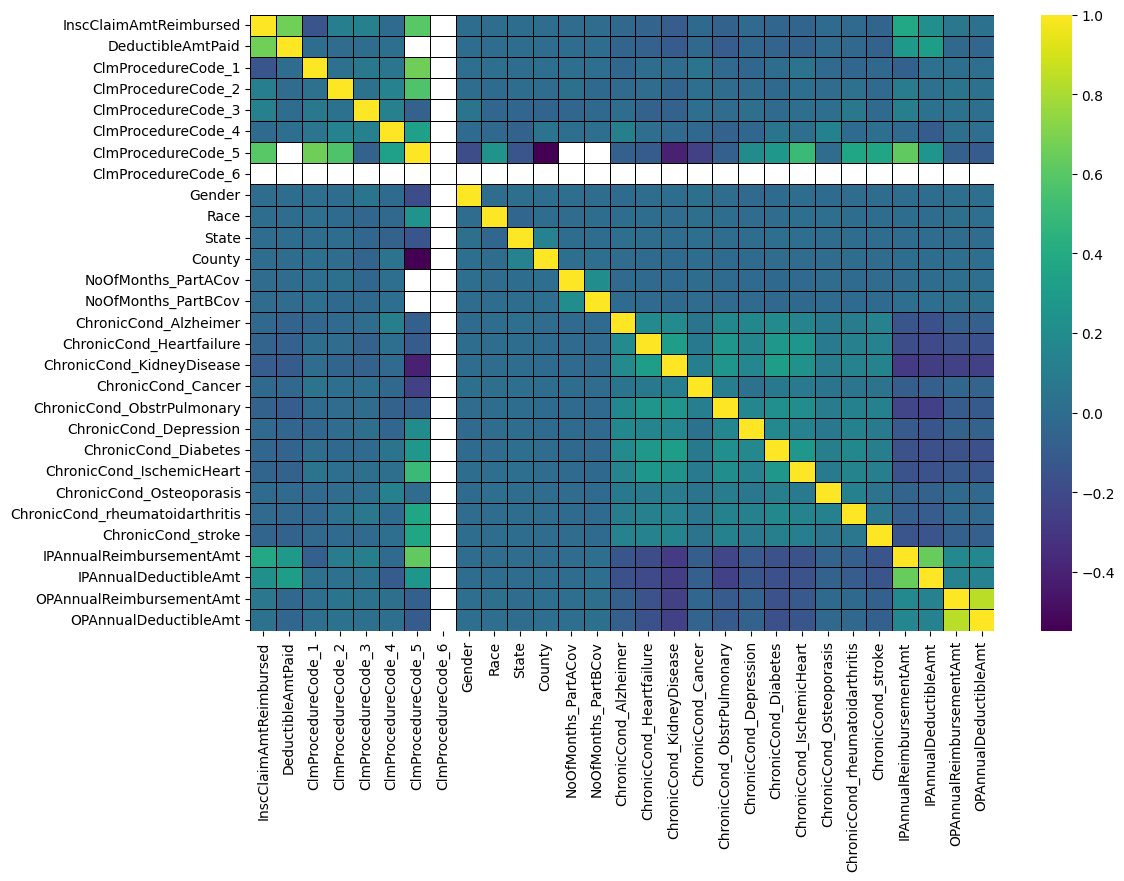

In [165]:
# Finding the correlation between numerical values 
correlation=final.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation,fmt='.2f',cmap='viridis',linewidths=0.5,linecolor='black')
plt.show()

In [166]:
obj_cols=final.select_dtypes(include=object).columns
obj_cols

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'DOB', 'DOD',
       'RenalDiseaseIndicator'],
      dtype='object')

In [167]:
final.isna().sum()

Provider                                0
PotentialFraud                     135392
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1855
OperatingPhysician                 551963
OtherPhysician                     445235
AdmissionDt                        643578
ClmAdmitDiagnosisCode              512348
DeductibleAmtPaid                    1095
DischargeDt                        643578
DiagnosisGroupCode                 643578
ClmDiagnosisCode_1                  13031
ClmDiagnosisCode_2                 243391
ClmDiagnosisCode_3                 391900
ClmDiagnosisCode_4                 489450
ClmDiagnosisCode_5                 554881
ClmDiagnosisCode_6                 589051
ClmDiagnosisCode_7                 611641
ClmDiagnosisCode_8                 627437
ClmDiagnosisCode_9                

In [168]:
# Column Dropping
# Dropping columns and reasons 
# ClmDiagnosisCode_2 to 10 - Too many missing values 
# ClmProcedureCode_1 to 6 - Too many missing values
# DiagnosisGroupCode, ClmAdmitDiagnosisCode, OtherPhysician,
# +OperatingPhysician,DOD -- Too many missing values


drop_cols=['ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
           'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1',
           'ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6',
           'ClmAdmitDiagnosisCode','OtherPhysician','OperatingPhysician','NoOfMonths_PartACov','NoOfMonths_PartBCov',
           'DOD','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','DiagnosisGroupCode',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

final.drop(drop_cols,axis=1,inplace=True)

In [169]:
final.isna().sum()

Provider                                0
PotentialFraud                     135392
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1855
AdmissionDt                        643578
DeductibleAmtPaid                    1095
DischargeDt                        643578
ClmDiagnosisCode_1                  13031
DOB                                     0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression            

In [170]:
# Finding the unique values and value counts of other columns with missing values 
print(final['AttendingPhysician'].unique())
print(final['DeductibleAmtPaid'].unique())
print(final['ClmDiagnosisCode_1'].unique())

['PHY340163' 'PHY346762' 'PHY383193' ... 'PHY361341' 'PHY323525'
 'PHY314838']
[1068.    0.   70.   50.   30.  100.   60.   20.   40.   10.  200.   80.
   90.   nan  865.  876.  897.  886.  854.]
['29650' '0388' '56211' ... '09853' '74764' '64791']


In [171]:
#Filling missing values
final['AttendingPhysician'].fillna(final['AttendingPhysician'].mode()[0],inplace=True)
final['DeductibleAmtPaid'].fillna(final['DeductibleAmtPaid'].mean(),inplace=True)
final['ClmDiagnosisCode_1'].fillna(final['ClmDiagnosisCode_1'].mode()[0],inplace=True)

In [172]:
# task 1 - beneficiary id
# finding pattern between beneficiary id and claims 
# final['noofclaimsperBENID']=final.groupby('BeneID') ['ClaimID'].transform('count')

In [173]:
#Data Convertion
# columns with value 1,2
convert_cols=['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
for i in convert_cols:
    final[i]=final[i].map({1:0,2:1})
#Converting RenalDiseaseIndicator to 0 and 1    
final['RenalDiseaseIndicator']=final['RenalDiseaseIndicator'].map({'Y':1,'0':0}) 

In [174]:
# Visualization

<Axes: xlabel='PotentialFraud', ylabel='count'>

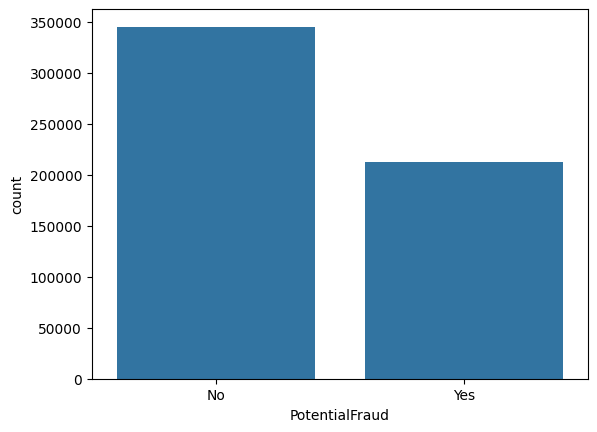

In [175]:
sns.countplot(x='PotentialFraud',data=train_merge)

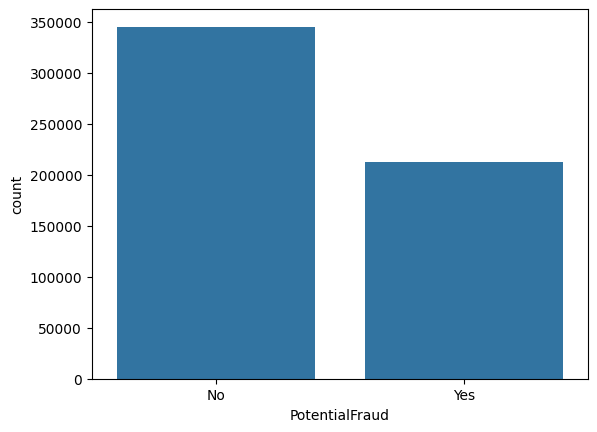

In [176]:
sns.countplot(x='PotentialFraud',data=final)
plt.show()

In [177]:
# count_plot of categorical values 
categorical_cols=['Gender','Race','RenalDiseaseIndicator','ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',]

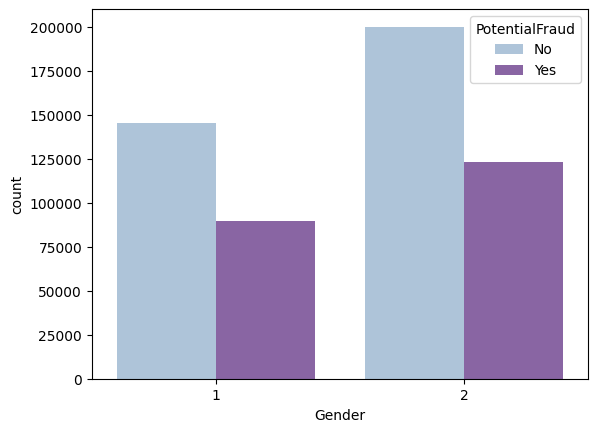

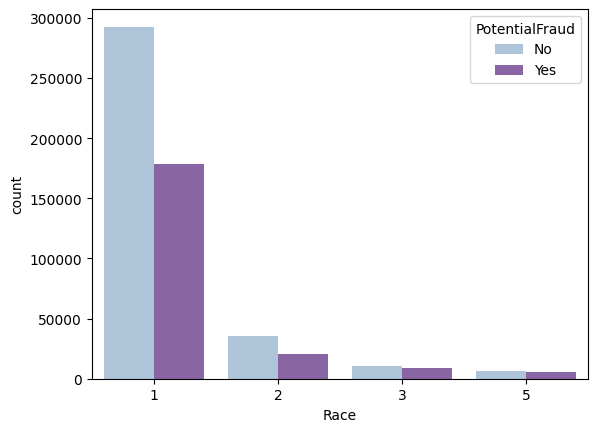

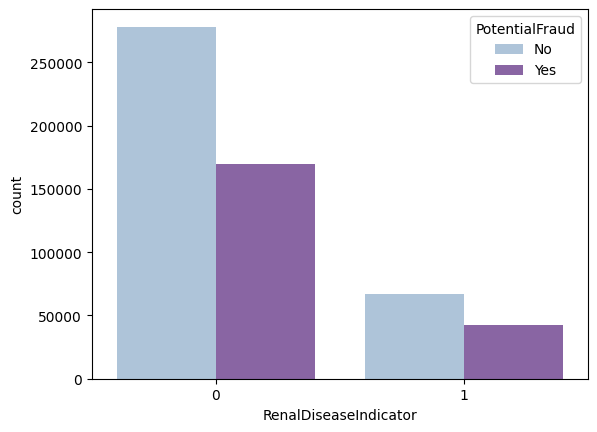

In [178]:
for i in categorical_cols[:3]:
    sns.countplot(x=i,data=final,hue='PotentialFraud',palette='BuPu',color='lightgreen',saturation=0.8)
    plt.show()

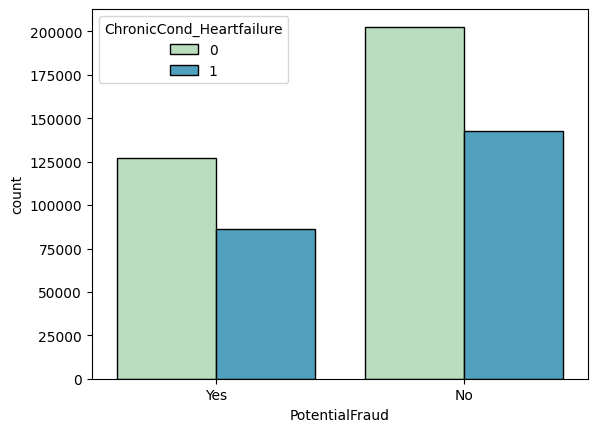

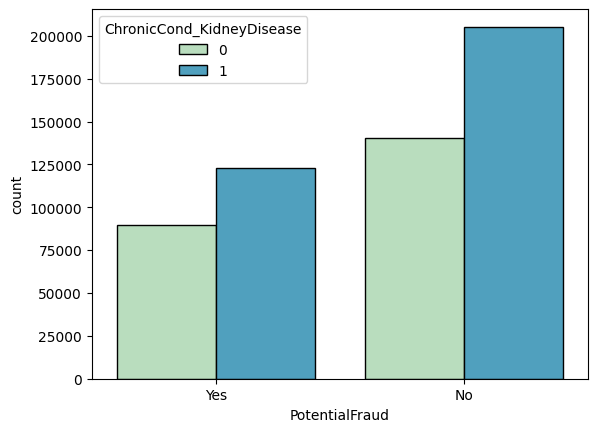

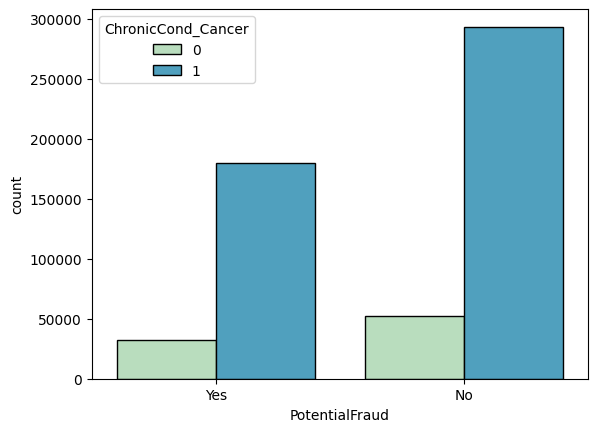

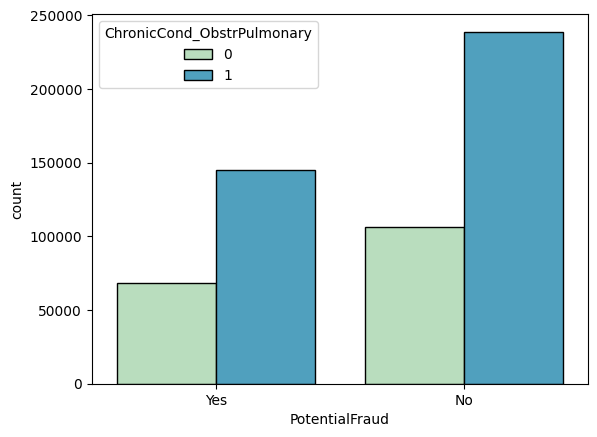

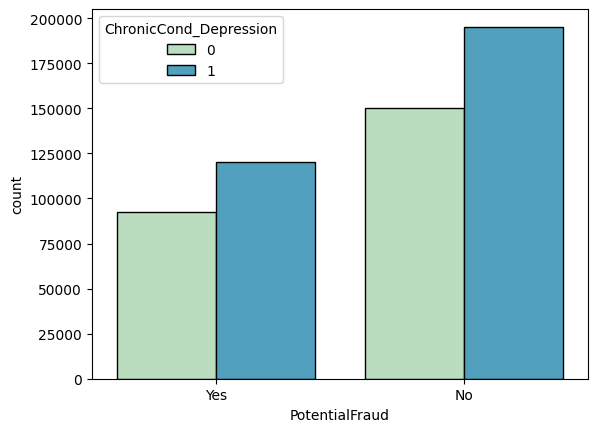

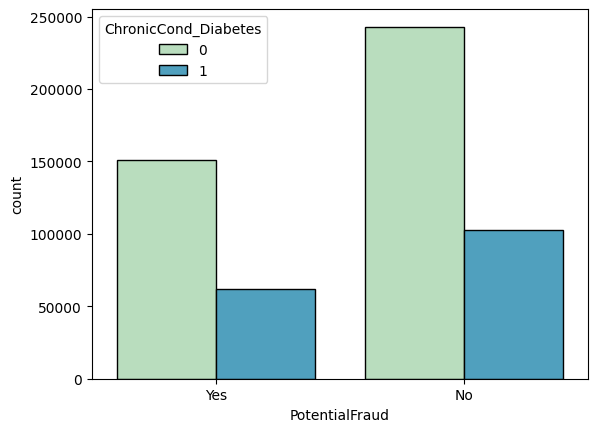

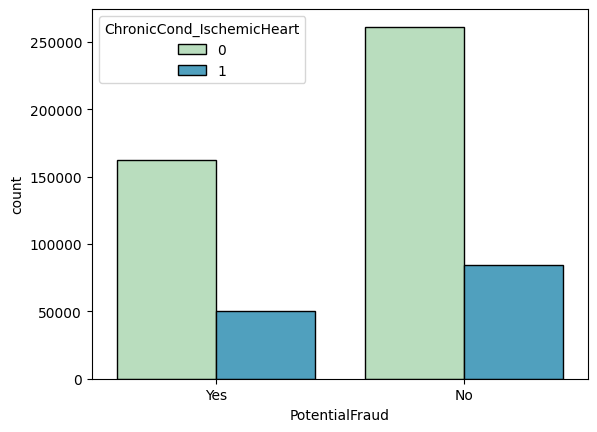

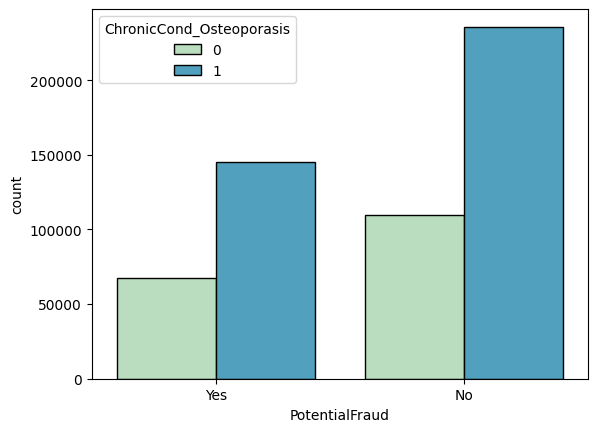

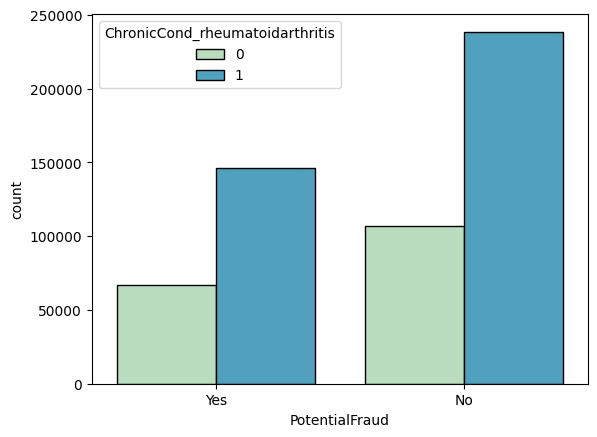

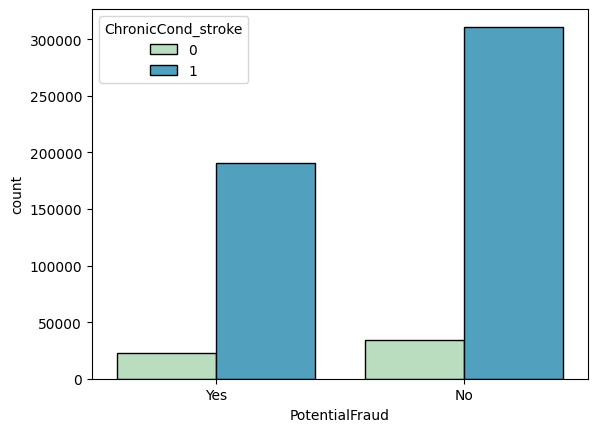

In [179]:
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22","#17becf"]

for i,col in zip(categorical_cols[4:],colors):
    sns.countplot(x='PotentialFraud',data=final,hue=i,palette='GnBu',order=['Yes','No'],color=col,edgecolor='black',saturation=0.8)
    plt.show()

In [180]:
# Calculating ages
 
#converting the object date into date format
final['DOB']=pd.to_datetime(final['DOB']).dt.year
final['age']=2009-final['DOB']


In [181]:
#Dropping DOB column
final.drop('DOB',axis=1,inplace=True)


In [182]:
age_sorted=sorted(map(int,final['age'].unique()))
print(*age_sorted)

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


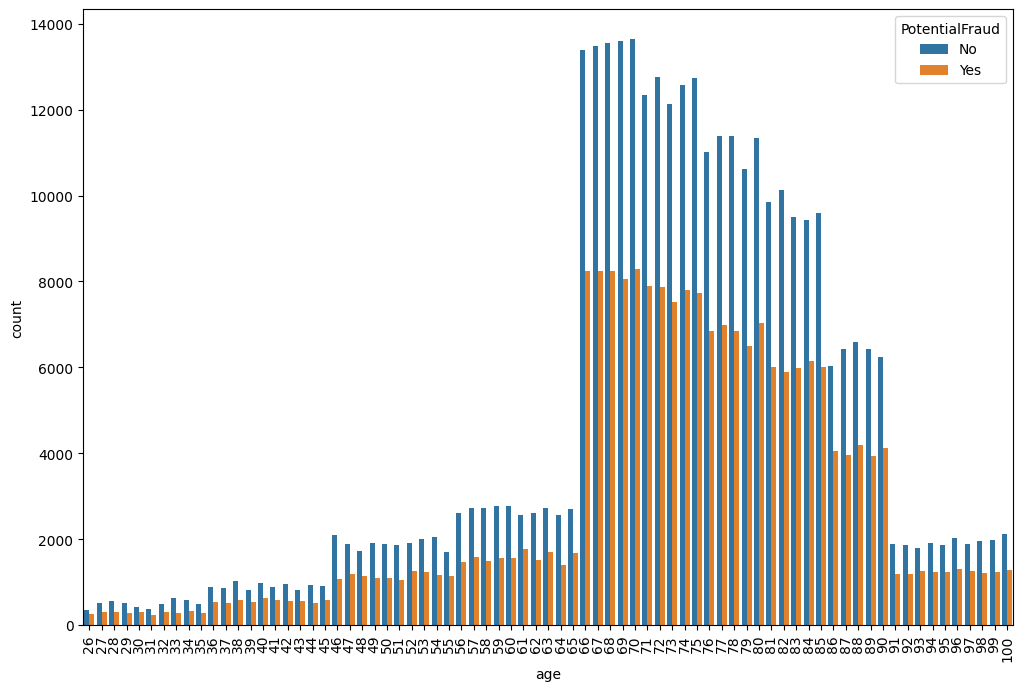

In [183]:
plt.figure(figsize=(12,8))
sns.countplot(x="age", hue="PotentialFraud", data=final)
plt.xticks(rotation=90)
plt.show()

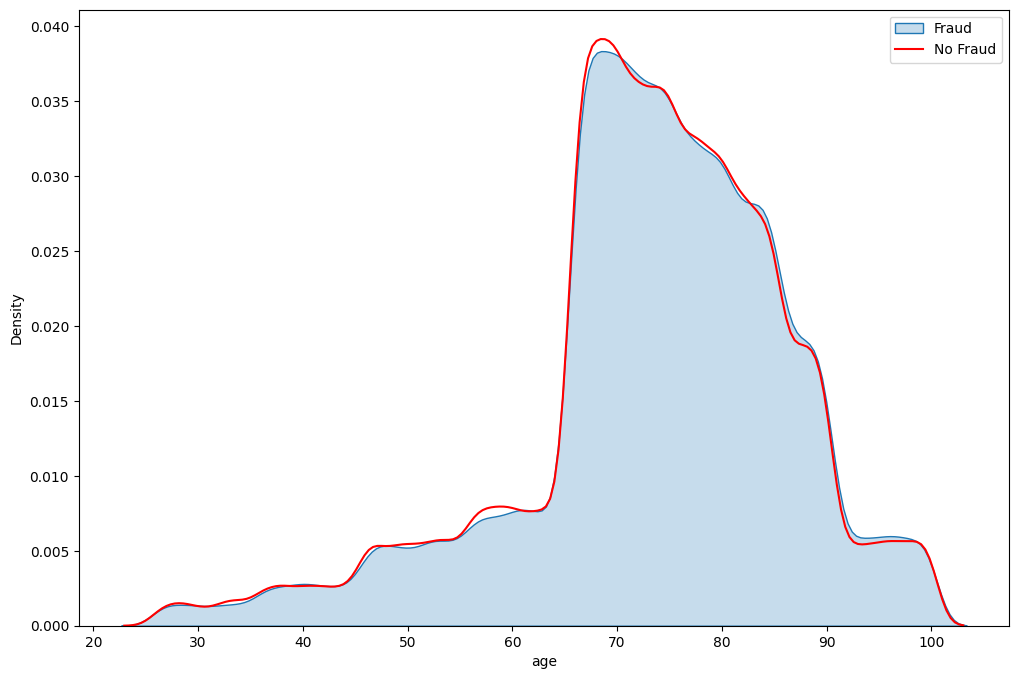

In [184]:
plt.figure(figsize=(12,8))
sns.kdeplot(final[final['PotentialFraud'] == 'Yes']['age'], label='Fraud',shade=True)
sns.kdeplot(final[final['PotentialFraud'] == 'No']['age'], label='No Fraud',color='Red')
plt.legend()
plt.show()


In [185]:
# calculating claim duration (days between claim start data and end date)
final['ClaimStartDt']=pd.to_datetime(final['ClaimStartDt'])
final['ClaimEndDt']=pd.to_datetime(final['ClaimEndDt'])
final['clm_duration']=(final['ClaimEndDt']-final['ClaimStartDt']).dt.days 

In [186]:
final.drop(['ClaimStartDt','ClaimEndDt'],axis=1,inplace=True)

In [187]:
days=final['clm_duration'].unique()
print(*days)

4 2 5 14 0 1 9 6 7 3 15 11 13 27 20 18 8 12 16 19 17 10 28 23 24 25 33 29 35 21 22 30 26 32 31 34 36


[]

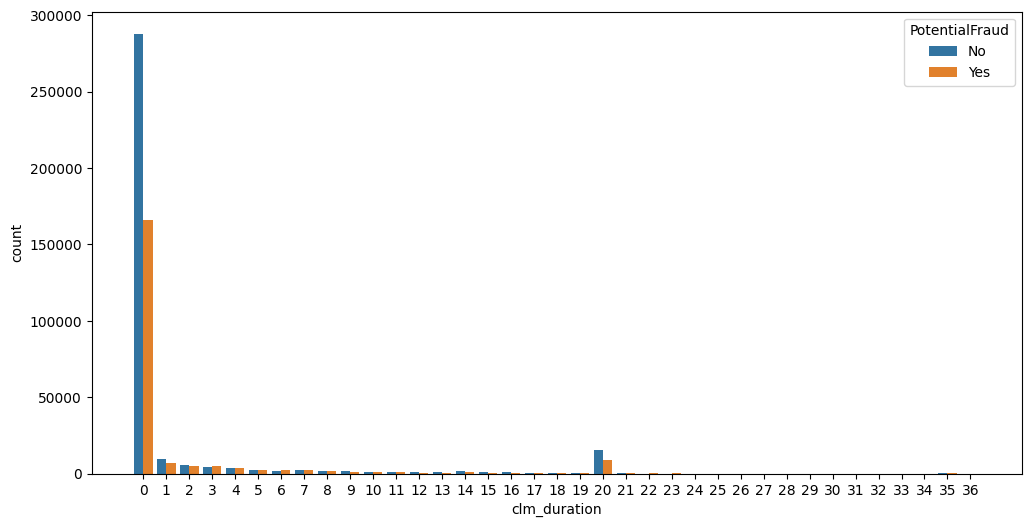

In [188]:
plt.figure(figsize=(12,6))
sns.countplot(x='clm_duration',data=final,hue='PotentialFraud')
plt.plot()

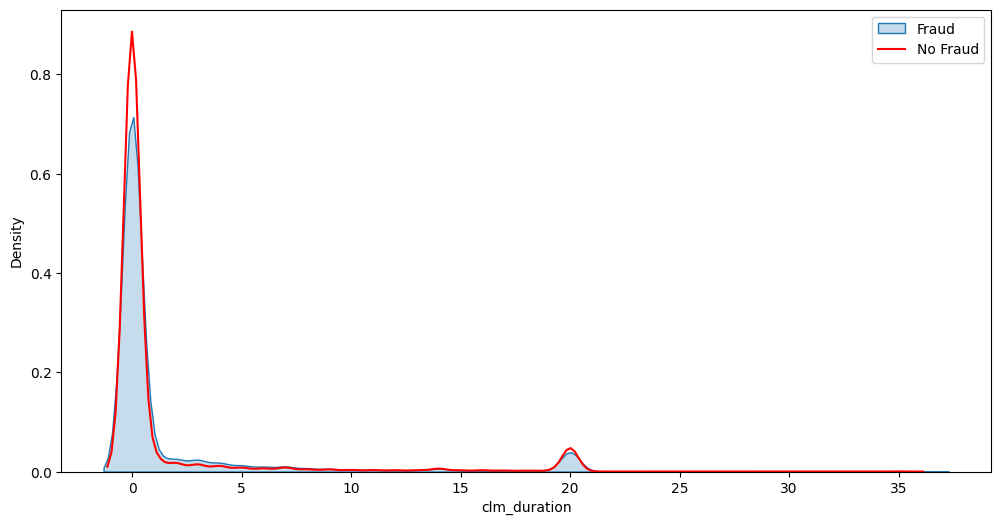

In [189]:
plt.figure(figsize=(12,6))
sns.kdeplot(final[final['PotentialFraud'] == 'Yes']['clm_duration'], label='Fraud',shade=True)
sns.kdeplot(final[final['PotentialFraud'] == 'No']['clm_duration'], label='No Fraud',color='Red')
plt.legend()
plt.show()

In [190]:
# Calculating Length Of Stay(LOS)
# two columns admission date and discharge date are present only in Inpatient data 
# finding the LOS in INpatient data and assign 0 to Outpatient data

final['AdmissionDt']=pd.to_datetime(final['AdmissionDt'],errors='coerce') 
final['DischargeDt']=pd.to_datetime(final['DischargeDt'],errors='coerce')  
                            # coerce - used to convert not parsable date format into NAT(not a date)

final['LOS']=(final['DischargeDt']-final['AdmissionDt']).dt.days

final['LOS'].fillna(0,inplace=True)


In [191]:
los_days=final['LOS'].unique()
print(*los_days)

4.0 2.0 5.0 14.0 0.0 6.0 7.0 3.0 15.0 11.0 1.0 13.0 27.0 9.0 17.0 8.0 12.0 10.0 28.0 23.0 16.0 18.0 24.0 25.0 33.0 29.0 35.0 19.0 21.0 22.0 20.0 30.0 26.0 32.0 31.0 34.0


[]

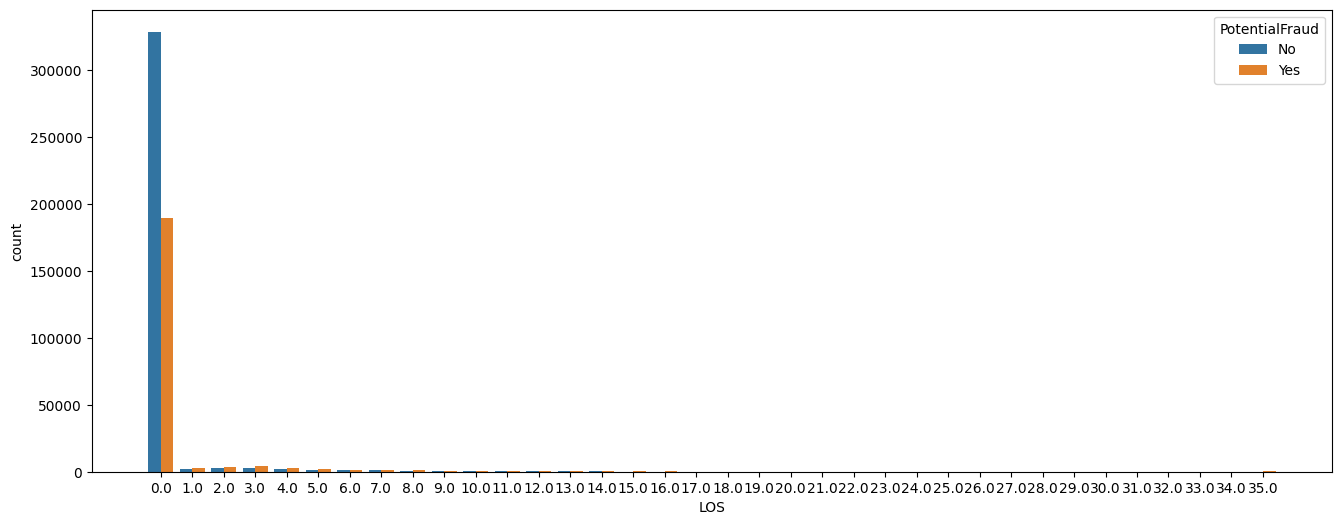

In [192]:
plt.figure(figsize=(16,6))
sns.countplot(x='LOS',data=final,hue='PotentialFraud')
plt.plot()

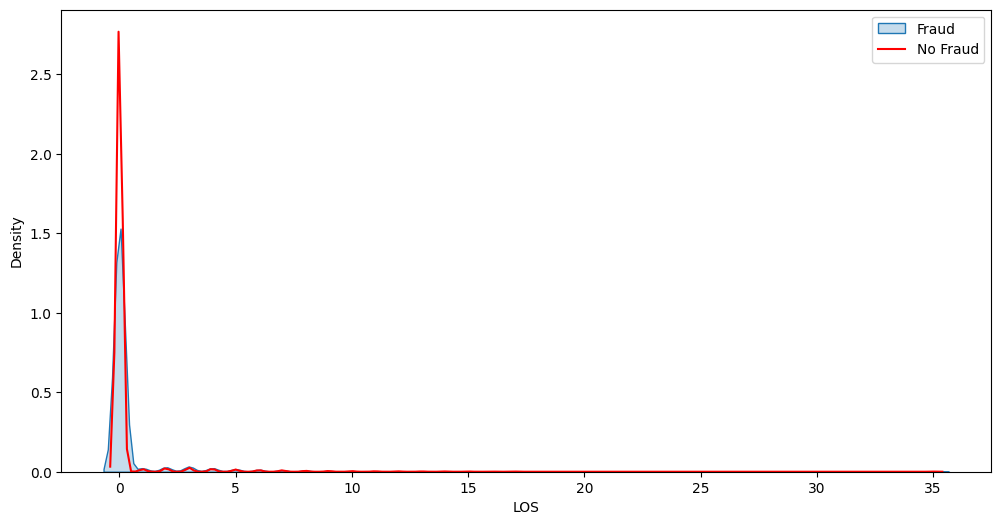

In [193]:
plt.figure(figsize=(12,6))
sns.kdeplot(final[final['PotentialFraud'] == 'Yes']['LOS'], label='Fraud',shade=True)
sns.kdeplot(final[final['PotentialFraud'] == 'No']['LOS'], label='No Fraud',color='Red')
plt.legend()
plt.show()

In [194]:
# dropping admission date and discharge date 
final.drop(['AdmissionDt','DischargeDt'],axis=1,inplace=True)

In [195]:
# splitting the training data and testing data 
training_data=final[final['PotentialFraud'].notna()]    # OR x_train = final.dropna()
training_data

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,...,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,age,clm_duration,LOS
0,PRV51001,No,BENE36012,CLM58316,36000,PHY340163,1068.0,29650,1,1,...,1,0,0,0,1,1,0,69,4,4.0
1,PRV51001,No,BENE38773,CLM52334,12000,PHY346762,1068.0,0388,1,1,...,1,1,1,1,1,1,1,71,2,2.0
2,PRV51001,No,BENE98831,CLM36844,3000,PHY383193,1068.0,56211,2,1,...,1,0,0,0,1,0,1,75,5,5.0
3,PRV51001,No,BENE102690,CLM49733,42000,PHY383193,1068.0,4241,2,1,...,0,0,0,0,1,0,1,80,14,14.0
4,PRV51001,No,BENE152088,CLM37205,4000,PHY402229,1068.0,85222,2,1,...,0,0,0,0,1,0,0,96,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV57763,No,BENE148535,CLM582682,1100,PHY321072,40.0,72740,2,2,...,1,0,0,0,0,0,1,69,9,0.0
558207,PRV57763,No,BENE150998,CLM553988,200,PHY321072,0.0,V1251,1,2,...,1,1,1,1,1,1,1,51,0,0.0
558208,PRV57763,No,BENE151006,CLM610854,80,PHY321072,0.0,79022,2,1,...,0,1,0,0,1,1,1,46,0,0.0
558209,PRV57763,No,BENE158531,CLM691834,3300,PHY321072,0.0,41406,2,2,...,1,1,0,0,1,1,1,57,0,0.0


In [196]:
testing_data=final[final['PotentialFraud'].isna()]
testing_data

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,...,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,age,clm_duration,LOS
558211,PRV51002,NaN,BENE13342,CLM129901,100,PHY418314,0.0,514,2,1,...,1,1,0,1,1,1,1,75,0,0.0
558212,PRV51002,NaN,BENE13915,CLM163936,40,PHY399539,0.0,7840,2,1,...,0,0,0,0,1,1,1,88,0,0.0
558213,PRV51002,NaN,BENE13915,CLM348696,70,PHY352340,0.0,V4581,2,1,...,0,0,0,0,1,1,1,88,0,0.0
558214,PRV51002,NaN,BENE13915,CLM500906,100,PHY366184,0.0,42789,2,1,...,0,0,0,0,1,1,1,88,0,0.0
558215,PRV51002,NaN,BENE14575,CLM272820,400,PHY401762,0.0,1532,2,1,...,0,1,0,0,0,1,0,48,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693598,PRV57750,NaN,BENE142702,CLM672301,1300,PHY323525,0.0,7222,2,1,...,1,0,0,0,1,1,1,67,1,0.0
693599,PRV57750,NaN,BENE143805,CLM603938,10,PHY374125,0.0,4415,2,1,...,1,0,1,0,1,1,1,97,0,0.0
693600,PRV57750,NaN,BENE146568,CLM236733,200,PHY323525,0.0,V1301,2,2,...,1,0,1,0,1,1,1,49,0,0.0
693601,PRV57750,NaN,BENE148715,CLM624293,2300,PHY323525,0.0,2720,2,1,...,0,1,0,0,1,1,1,46,2,0.0


In [197]:
                                       #    Encoding

In [198]:

# frequency encoding,label encoding - doesn't consider the relation between column and target
# hash encoding - repetition of value possibility (-1,0,1)
# one-hot, get dummies - too many columns
# best target encoding but data leakage for single dataset
# Provider, BeneID, AttendingPhysician 

In [199]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()
encoding_cols=['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1']
training_data[encoding_cols]=encoder.fit_transform(training_data[encoding_cols],training_data['PotentialFraud'])
testing_data[encoding_cols]=encoder.transform(testing_data[encoding_cols])
training_data


,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,...,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,age,clm_duration,LOS
0,0.143923,No,0.322327,CLM58316,36000,0.331612,1068.0,0.434108,1,1,...,1,0,0,0,1,1,0,69,4,4.0
1,0.143923,No,0.437678,CLM52334,12000,0.331612,1068.0,0.464789,1,1,...,1,1,1,1,1,1,1,71,2,2.0
2,0.143923,No,0.331612,CLM36844,3000,0.327136,1068.0,0.510256,2,1,...,1,0,0,0,1,0,1,75,5,5.0
3,0.143923,No,0.349854,CLM49733,42000,0.327136,1068.0,0.470874,2,1,...,0,0,0,0,1,0,1,80,14,14.0
4,0.143923,No,0.421123,CLM37205,4000,0.331612,1068.0,0.330164,2,1,...,0,0,0,0,1,0,0,96,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0.000021,No,0.299569,CLM582682,1100,0.000021,40.0,0.444303,2,2,...,1,0,0,0,0,0,1,69,9,0.0
558207,0.000021,No,0.331612,CLM553988,200,0.000021,0.0,0.323254,1,2,...,1,1,1,1,1,1,1,51,0,0.0
558208,0.000021,No,0.371740,CLM610854,80,0.000021,0.0,0.375344,2,1,...,0,1,0,0,1,1,1,46,0,0.0
558209,0.000021,No,0.299569,CLM691834,3300,0.000021,0.0,0.389447,2,2,...,1,1,0,0,1,1,1,57,0,0.0


In [200]:
# splitting the data into x_train and y_train  and making test data
x_train=training_data.drop(['PotentialFraud','ClaimID'],axis=1)
y_train=training_data['PotentialFraud']
x_test=testing_data.drop(['PotentialFraud','ClaimID'],axis=1)
x_train

,Provider,BeneID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,age,clm_duration,LOS
0,0.143923,0.322327,36000,0.331612,1068.0,0.434108,1,1,0,1,...,1,0,0,0,1,1,0,69,4,4.0
1,0.143923,0.437678,12000,0.331612,1068.0,0.464789,1,1,0,1,...,1,1,1,1,1,1,1,71,2,2.0
2,0.143923,0.331612,3000,0.327136,1068.0,0.510256,2,1,0,1,...,1,0,0,0,1,0,1,75,5,5.0
3,0.143923,0.349854,42000,0.327136,1068.0,0.470874,2,1,1,1,...,0,0,0,0,1,0,1,80,14,14.0
4,0.143923,0.421123,4000,0.331612,1068.0,0.330164,2,1,1,1,...,0,0,0,0,1,0,0,96,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0.000021,0.299569,1100,0.000021,40.0,0.444303,2,2,0,21,...,1,0,0,0,0,0,1,69,9,0.0
558207,0.000021,0.331612,200,0.000021,0.0,0.323254,1,2,0,21,...,1,1,1,1,1,1,1,51,0,0.0
558208,0.000021,0.371740,80,0.000021,0.0,0.375344,2,1,1,21,...,0,1,0,0,1,1,1,46,0,0.0
558209,0.000021,0.299569,3300,0.000021,0.0,0.389447,2,2,0,21,...,1,1,0,0,1,1,1,57,0,0.0


In [201]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))


Before SMOTE: Counter({'No': 345415, 'Yes': 212796})


In [202]:
# Find max allowed ratio
max_ratio = len(y_train[y_train == "Yes"]) / len(y_train[y_train == "No"])
print(f"Max Allowed Sampling Ratio: {max_ratio:.2f}")


Max Allowed Sampling Ratio: 0.62


In [203]:
# Potential fraud  Yes = 38%  No = 62%   Imbalanced data   471,650 No and 221,953 Yes
# using SMOTE (Synthetic Minority Oversampling Technique)
# from imblearn.combine import SMOTETomek
# smote=SMOTETomek(sampling_strategy=0.6,random_state=42)
# x_sampled,y_sampled=smote.fit_resample(x_train,y_train)

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.62,random_state=42)
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [204]:
# y_smote

In [205]:
from imblearn.under_sampling import TomekLinks
tomek=TomekLinks()
x_final,y_final=tomek.fit_resample(x_smote,y_smote)


In [206]:
x_test

,Provider,BeneID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,age,clm_duration,LOS
558211,0.381211,0.330164,100,0.381211,0.0,0.396296,2,1,0,1,...,1,1,0,1,1,1,1,75,0,0.0
558212,0.381211,0.443161,40,0.381211,0.0,0.435627,2,1,0,1,...,0,0,0,0,1,1,1,88,0,0.0
558213,0.381211,0.443161,70,0.381211,0.0,0.357143,2,1,0,1,...,0,0,0,0,1,1,1,88,0,0.0
558214,0.381211,0.443161,100,0.381211,0.0,0.413951,2,1,0,1,...,0,0,0,0,1,1,1,88,0,0.0
558215,0.381211,0.413158,400,0.381211,0.0,0.410169,2,1,0,1,...,0,1,0,0,0,1,0,48,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693598,0.381211,0.317174,1300,0.381211,0.0,0.352113,2,1,0,45,...,1,0,0,0,1,1,1,67,1,0.0
693599,0.381211,0.299569,10,0.381211,0.0,0.389258,2,1,0,45,...,1,0,1,0,1,1,1,97,0,0.0
693600,0.381211,0.381211,200,0.381211,0.0,0.385965,2,2,0,45,...,1,0,1,0,1,1,1,49,0,0.0
693601,0.381211,0.402408,2300,0.381211,0.0,0.355140,2,1,0,45,...,0,1,0,0,1,1,1,46,2,0.0


In [207]:
y_final

0          No
1          No
2          No
3          No
4          No
         ... 
518897    Yes
518898    Yes
518899    Yes
518900    Yes
518901    Yes
Name: PotentialFraud, Length: 518902, dtype: object

In [208]:
                            # Model Training 
# using Decision tree and Random Forest                             

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Dt_entropy=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=5)
Dt_gini=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=5)
rf=RandomForestClassifier(n_estimators=100,max_depth=10)

Dt_entropy.fit(x_final,y_final)
y_pred_DTE=Dt_entropy.predict(x_test)
y_pred_DTE


array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(135392,), dtype=object)

In [210]:
Dt_gini.fit(x_final,y_final)
y_pred_DTG=Dt_gini.predict(x_test)
y_pred_DTG

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(135392,), dtype=object)

In [211]:
rf.fit(x_final,y_final)
y_pred_rf=rf.predict(x_test)

In [223]:
import joblib

# Save the trained model
joblib.dump(rf, 'Healthcare_fraud_detection_copy.pkl')

['Healthcare_fraud_detection_copy.pkl']

In [212]:
# unseen data testing
unseen_data = pd.read_csv('updated_with_dates.csv')

unseen_data.rename(columns={"Unnamed: 0": "ID"}, inplace=True)  # Change to a meaningful name
unseen_data.to_csv('updated_with_date.csv')

In [213]:
# unseen data testing
unseen_data = pd.read_csv('updated_with_dates.csv')
unseen_data.drop(['ClaimID'],axis=1,inplace=True)
unseen_data.rename(columns={"Unnamed: 0": "ID"}, inplace=True)  # Change to a meaningful name
unseen_data.to_csv('updated_with_date.csv')


In [214]:
unseen_data = unseen_data.reset_index()

In [215]:
x_test.columns

Index(['Provider', 'BeneID', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'age',
       'clm_duration', 'LOS'],
      dtype='object')

In [216]:
unseen_data.columns

Index(['index', 'ID', 'Provider', 'BeneID', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt',
       'DischargeDt', 'DOB'],
      dtype='object')

In [ ]:

# Assuming the encoder is already fitted on the training data
df = unseen_data
encods = ['Provider', 'BeneID', 'AttendingPhysician', 'ClmDiagnosisCode_1']

# Encode all categorical columns at once
df[encods] = encoder.transform(df[encods])




# Process DOB
if 'DOB' in df.columns:
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
    df['age'] = 2009 - df['DOB'].dt.year
else:
    df['age'] = 0  # or df['age'] = some default value
df.drop(columns=['DOB'], errors='ignore', inplace=True)

# Process Claim dates
if 'ClaimStartDt' in df.columns and 'ClaimEndDt' in df.columns:
    df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], errors='coerce')
    df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], errors='coerce')
    df['clm_duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days
else:
    df['clm_duration'] = 0
df.drop(columns=['ClaimStartDt', 'ClaimEndDt'], errors='ignore', inplace=True)

# Process Admission and Discharge dates
if 'AdmissionDt' in df.columns and 'DischargeDt' in df.columns:
    df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'], errors='coerce')
    df['DischargeDt'] = pd.to_datetime(df['DischargeDt'], errors='coerce')
    df['LOS'] = (df['DischargeDt'] - df['AdmissionDt']).dt.days
    df['LOS'].fillna(0, inplace=True)
else:
    df['LOS'] = 0
df.drop(columns=['AdmissionDt', 'DischargeDt','ID','index'], errors='ignore', inplace=True)

    # Final step: select model's required features only



In [218]:
# Predicting Value with Unseen Data
unseen_pred = rf.predict(df)
unseen_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [219]:
unseen_data.shape

(10, 25)

In [220]:
x_test.shape

(135392, 25)

In [221]:
# sample_df = pd.read_csv('filtered_sample_100_rows.csv')
# #Data Convertion
# # columns with value 1,2
# convert_cols=['ChronicCond_Alzheimer',
#        'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
#        'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
#        'ChronicCond_Depression', 'ChronicCond_Diabetes',
#        'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
#        'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
# for i in convert_cols:
#     sample_df[i]=sample_df[i].map({1:0,2:1})
# #Converting RenalDiseaseIndicator to 0 and 1    
# sample_df['RenalDiseaseIndicator']=sample_df['RenalDiseaseIndicator'].map({'Y':1,'0':0}) 

In [222]:
# sample_df